In [18]:
import numpy as np
import SimpleITK as sitk
from matplotlib import pyplot as plt

In [19]:
# note that .npy files are preferablly load (compared to .npz files)

In [20]:
file1 = '/storage/nnUnet/nnUNet_preprocessed/Dataset213_ONKOI-all-from-208/nnUNetPlans_3d_fullres/ONKOI-all-from-208_001.npy'
data = np.load(file1, 'r')
data

memmap([[[[-1.1201875 , -1.1201875 , -1.1201875 , ..., -1.1201875 ,
           -1.1201875 , -1.1201875 ],
          [-1.1201875 , -1.1201875 , -1.1201875 , ..., -1.1201875 ,
           -1.1201875 , -1.1201875 ],
          [-1.1201875 , -1.1201875 , -1.1201875 , ..., -1.1201875 ,
           -1.1201875 , -1.1201875 ],
          ...,
          [-1.1201875 , -1.1201875 , -1.1201875 , ..., -1.1201875 ,
           -1.1201875 , -1.1201875 ],
          [-1.1201875 , -1.1201875 , -1.1201875 , ..., -1.1201875 ,
           -1.1201875 , -1.1201875 ],
          [-1.1201875 , -1.1201875 , -1.1201875 , ..., -1.1201875 ,
           -1.1201875 , -1.1201875 ]],

         [[-1.1201875 , -1.1201875 , -1.1201875 , ..., -1.1201875 ,
           -1.1201875 , -1.1201875 ],
          [-1.1201875 , -1.1201875 , -1.1201875 , ..., -1.1201875 ,
           -1.1201875 , -1.1201875 ],
          [-1.1201875 , -1.1201875 , -1.1201875 , ..., -1.1201875 ,
           -1.1201875 , -1.1201875 ],
          ...,
          [-1.

In [21]:
data.shape

(2, 115, 543, 705)

In [22]:
ct_sitk = sitk.GetImageFromArray(data[0])
mr_sitk = sitk.GetImageFromArray(data[1])
ct_sitk.SetSpacing([0.5,0.5,2])
mr_sitk.SetSpacing([0.5,0.5,2])

In [23]:
sitk.WriteImage(ct_sitk, '/media/medical/gasperp/projects/nnUnetv2_clone/nnUNet/nnunetv2/tests/001_ct.nii.gz')
sitk.WriteImage(mr_sitk, '/media/medical/gasperp/projects/nnUnetv2_clone/nnUNet/nnunetv2/tests/001_mr.nii.gz')

(array([5.8830000e+03, 2.6530365e+07, 4.1679480e+06, 5.4639100e+05,
        3.6656600e+05, 3.0346400e+05, 3.1235600e+05, 3.6136000e+05,
        4.0367800e+05, 4.2171600e+05, 4.2972000e+05, 4.3775100e+05,
        4.4791500e+05, 4.5475000e+05, 4.6403700e+05, 4.7863800e+05,
        5.0563900e+05, 5.3641000e+05, 5.7721500e+05, 6.1731000e+05,
        6.5362900e+05, 6.8864600e+05, 7.3691500e+05, 7.4394700e+05,
        6.2237400e+05, 4.5675200e+05, 3.3819700e+05, 2.6002900e+05,
        2.0265000e+05, 1.6230800e+05, 1.3187200e+05, 1.0803400e+05,
        8.9433000e+04, 7.3863000e+04, 6.0468000e+04, 5.0493000e+04,
        4.2093000e+04, 3.5738000e+04, 2.9804000e+04, 2.4794000e+04,
        2.0946000e+04, 1.7495000e+04, 1.4587000e+04, 1.2266000e+04,
        1.0699000e+04, 8.7780000e+03, 7.4840000e+03, 6.5240000e+03,
        5.7210000e+03, 3.8074000e+04]),
 array([-0.77316153, -0.65736675, -0.54157197, -0.42577723, -0.30998248,
        -0.1941877 , -0.07839294,  0.03740183,  0.1531966 ,  0.26899135

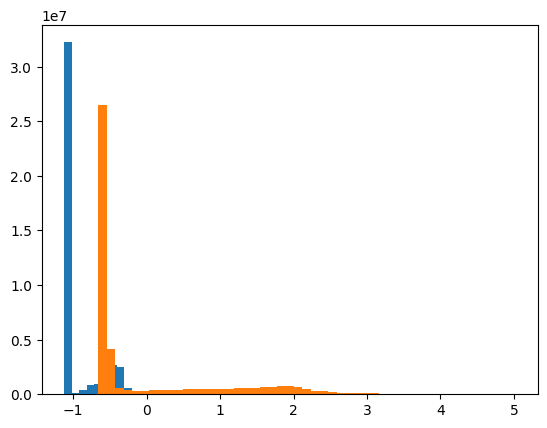

In [24]:
plt.figure()
plt.hist(data[0].flatten(), bins=50)
plt.hist(data[1].flatten(), bins=50)

In [30]:
from dipy.denoise.gibbs import gibbs_removal

In [31]:
unringed_volume = gibbs_removal(data[1], slice_axis=0, num_processes=8, inplace=False)
unringed_volume.shape

(115, 543, 705)

In [32]:
mr_sitk_denoised = sitk.GetImageFromArray(unringed_volume)
mr_sitk_denoised.SetSpacing([0.5,0.5,2])
sitk.WriteImage(mr_sitk_denoised, '/media/medical/gasperp/projects/nnUnetv2_clone/nnUNet/nnunetv2/tests/001_mr_denoised.nii.gz')

In [50]:
fltr = sitk.GradientAnisotropicDiffusionImageFilter()
fltr.SetConductanceParameter(3.0) # default is 3.0
fltr.SetNumberOfIterations(2) # default is 5
fltr.SetTimeStep(0.03) # default is 0.125
mr_sitk_grd_ans = fltr.Execute(mr_sitk)

In [51]:
fltr.GetConductanceParameter()

3.0

In [52]:
fltr.GetNumberOfIterations()

2

In [53]:
mr_sitk_grd_ans

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7f0a1c80b720> >

In [54]:
sitk.WriteImage(mr_sitk_grd_ans, '/media/medical/gasperp/projects/nnUnetv2_clone/nnUNet/nnunetv2/tests/001_mr_sitk_grd_ans.nii.gz')